In [2]:
import requests
from requests.auth import HTTPBasicAuth
import pandas as pd

# Configuration
FHIR_SERVER = 'http://aidbox:8080'
USERNAME = 'root'
PASSWORD = 'k5hlhmOYr4'

# Create Basic Auth header
auth = HTTPBasicAuth(USERNAME, PASSWORD)
headers = {
    'Content-Type': 'application/json'
}

# Example GET request
def make_request(endpoint, method='GET', data=None):
    url = f"{FHIR_SERVER}{endpoint}"
    response = requests.request(
        method=method,
        url=url,
        auth=auth,
        headers=headers,
        json=data
    )
    return response.json()

def sql(query):
    url = f"{FHIR_SERVER}/$sql"
    response = requests.post(url, auth=auth, headers=headers, json=[query])
    if response.status_code == 200:
        return pd.DataFrame(response.json())
    return response.json()




In [3]:
sql("SELECT id FROM Patient limit 10")

,id
0,000111d4-3efc-fcc2-25e4-49c31b62f42c
1,0002faef-649f-aa06-cfd1-0ecc1ec99235
2,0005fe04-55b6-c7c3-52d3-b76c74499d87
3,0007aebd-55a5-d08a-b2d0-7f95674d299f
4,0008a839-4c6d-6ebf-ecce-f1df6d086f90
5,00135e42-11b0-8671-7958-5285dd07cc43
6,0017d214-3884-46a7-5ec4-03dd48bd67f5
7,001994b4-835b-3b18-7faa-e46335536b66
8,001d6def-1a37-ef54-11ad-9f993d637c0a
9,001d9fd2-39ad-2456-09f4-c2098bd09227


In [4]:
# Example usage:
make_request('/fhir/Patient?_elements=id&_count=1')


{'resourceType': 'Bundle',
 'type': 'searchset',
 'meta': {'versionId': '0'},
 'total': 11199,
 'link': [{'relation': 'first',
   'url': 'http://localhost:8080/fhir/Patient?_elements=id&_count=1&page=1'},
  {'relation': 'self',
   'url': 'http://localhost:8080/fhir/Patient?_elements=id&_count=1&page=1'},
  {'relation': 'next',
   'url': 'http://localhost:8080/fhir/Patient?_elements=id&_count=1&page=2'},
  {'relation': 'last',
   'url': 'http://localhost:8080/fhir/Patient?_elements=id&_count=1&page=11199'}],
 'entry': [{'resource': {'id': 'a8a9c917-5f3f-62cd-b7f9-257c4600a8f2',
    'resourceType': 'Patient'},
   'search': {'mode': 'match'},
   'fullUrl': 'http://localhost:8080/Patient/a8a9c917-5f3f-62cd-b7f9-257c4600a8f2',
   'link': [{'relation': 'self',
     'url': 'http://localhost:8080/Patient/a8a9c917-5f3f-62cd-b7f9-257c4600a8f2'}]}]}

In [5]:
sql('select * from sof.patient_plus limit 10')

,patient_id,gender,dob,age
0,a8a9c917-5f3f-62cd-b7f9-257c4600a8f2,male,1978-11-15,46.0
1,a8adcc02-f9c1-839a-0223-c54656b4b52e,female,1972-09-29,52.0
2,a8c85c75-1688-34f4-1e51-3a0d2b9670f0,female,2002-05-21,23.0
3,a8ca2b9e-960a-a339-bc65-1003c765974d,female,1958-06-01,67.0
4,a8cb21ca-1cfc-2a51-2f23-29389c7ecdc2,female,1962-05-03,63.0
5,a8cc7034-9de8-b2c0-0821-c860264a0158,male,1952-06-26,72.0
6,a8cd957d-3af4-e3fe-c9e7-7547b5b261b2,female,1983-01-17,42.0
7,a8d35c66-c2a0-a278-7d05-12a3de6bcdee,female,2000-12-25,24.0
8,a8df1572-96cf-3c32-7989-40b71bc80b01,male,1950-03-14,75.0
9,a8ebe16d-56e4-b115-f06a-3127bb7e4ab8,male,1979-07-29,45.0


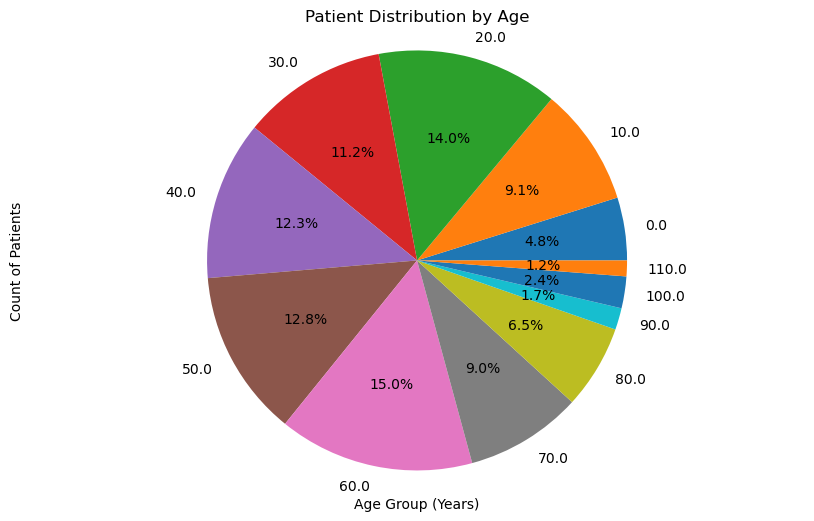

In [8]:
pt_by_age = sql('select round(age/10)*10 as age, count(*) from sof.patient_plus group by 1 order by age')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.pie(pt_by_age['count'], labels=pt_by_age['age'], autopct='%1.1f%%')
plt.title('Patient Distribution by Age')
plt.xlabel('Age Group (Years)')
plt.ylabel('Count of Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

